<a href="https://colab.research.google.com/github/oatanurakch/Tomato-Leaf_Disease-10Class/blob/main/CNN_TomatoLeafDisease_B6106164.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/ปี 4 เทอม 2/ML/tomato/train/'
val_dir = '/content/drive/MyDrive/ปี 4 เทอม 2/ML/tomato/val/'
test_dir = '/content/drive/MyDrive/ปี 4 เทอม 2/ML/tomato/test/'
target_size = (120, 120)

In [13]:
# Train Data
train_datagen = ImageDataGenerator(rescale = 1./255, width_shift_range = 0.2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = target_size, batch_size = 32, class_mode = 'categorical')

Found 8800 images belonging to 10 classes.


In [14]:
# Test Data
test_datagen = ImageDataGenerator(rescale = 1. / 255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = target_size, batch_size = 32, class_mode = 'categorical')

Found 1100 images belonging to 10 classes.


In [15]:
# Validate Data
val_datagen = ImageDataGenerator(rescale = 1. / 255)
val_generator = val_datagen.flow_from_directory(val_dir, target_size = target_size, batch_size = 32, class_mode = 'categorical')

Found 1100 images belonging to 10 classes.


In [16]:
# Check Training, Validate, Test Class
print('Training')
count_class, count_data = np.unique(train_generator.classes, return_counts = True)
print('Class : {}\nCount data per class: {}' .format(count_class, count_data))
print('Validate')
count_class_val, count_data_val = np.unique(val_generator.classes, return_counts = True)
print('Class : {}\nCount data per class: {}' .format(count_class_val, count_data_val))
print('Testing')
count_class_test, count_data_test = np.unique(test_generator.classes, return_counts = True)
print('Class : {}\nCount data per class: {}' .format(count_class_test, count_data_test))

Training
Class : [0 1 2 3 4 5 6 7 8 9]
Count data per class: [880 880 880 880 880 880 880 880 880 880]
Validate
Class : [0 1 2 3 4 5 6 7 8 9]
Count data per class: [110 110 110 110 110 110 110 110 110 110]
Testing
Class : [0 1 2 3 4 5 6 7 8 9]
Count data per class: [110 110 110 110 110 110 110 110 110 110]


In [17]:
print('Class in Answer: {}' .format(train_generator.class_indices))
print('Train Shape: {}' .format(train_generator[0][0].shape))
print('Train Dataset Class: {}' .format(train_generator.classes))

Class in Answer: {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
Train Shape: (32, 120, 120, 3)
Train Dataset Class: [0 0 0 ... 9 9 9]


# **Creat Model**

In [18]:
def Create_model():
  cnn_model = Sequential()
  cnn_model.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (120, 120, 3)))
  cnn_model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
  cnn_model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
  cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
  cnn_model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
  cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
  cnn_model.add(Flatten())
  cnn_model.add(Dense(32))
  cnn_model.add(Dropout(.5))
  cnn_model.add(Dense(10))
  cnn_model.add(Activation('softmax'))
  cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return cnn_model

In [19]:
model = Create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 57, 57, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 64)      

In [20]:
fit_model = model.fit(train_generator, validation_data = val_generator, batch_size = 32, epochs = 40, shuffle = True)

Epoch 1/40
275/275 [==============================] - 2151s 8s/step - loss: 0.3314 - accuracy: 0.2592 - val_loss: 0.2088 - val_accuracy: 0.5545
Epoch 2/40
275/275 [==============================] - 45s 162ms/step - loss: 0.2340 - accuracy: 0.5149 - val_loss: 0.1768 - val_accuracy: 0.6136
Epoch 3/40
275/275 [==============================] - 45s 163ms/step - loss: 0.1981 - accuracy: 0.6216 - val_loss: 0.1546 - val_accuracy: 0.6964
Epoch 4/40
275/275 [==============================] - 45s 162ms/step - loss: 0.1765 - accuracy: 0.6826 - val_loss: 0.1241 - val_accuracy: 0.7955
Epoch 5/40
275/275 [==============================] - 44s 162ms/step - loss: 0.1607 - accuracy: 0.7256 - val_loss: 0.1103 - val_accuracy: 0.8118
Epoch 6/40
275/275 [==============================] - 44s 161ms/step - loss: 0.1512 - accuracy: 0.7519 - val_loss: 0.1162 - val_accuracy: 0.7973
Epoch 7/40
275/275 [==============================] - 44s 161ms/step - loss: 0.1439 - accuracy: 0.7655 - val_loss: 0.1043 - val_acc

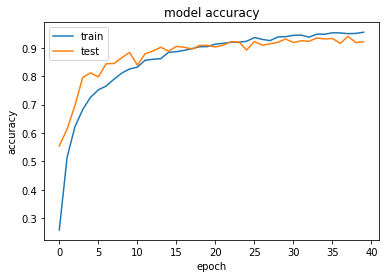

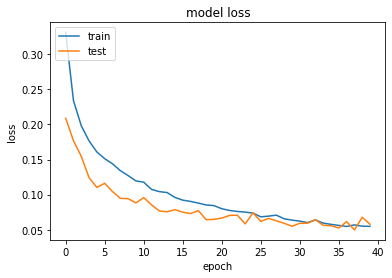

In [21]:
# Accuracy
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(test_generator, batch_size = 32,)
print('Test loss: {}' .format(test_loss))
print('Test Accuracy: {}' .format(test_acc))

35/35 [==============================] - 313s 9s/step - loss: 0.0514 - accuracy: 0.9400
Test loss: 0.051400549709796906
Test Accuracy: 0.9399999976158142


# **Save Model to .h**

In [24]:
model.save("/content/drive/MyDrive/ปี 4 เทอม 2/ML/tomato/saveModel/Tomato-Leaf-Disease-B6106164.h5")

# **Function for Predict**

In [25]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def predict_img(model, filename):
  img_size = (120, 120)
  # Load Image with 64 x 64
  test_img = load_img(filename, target_size = img_size)
  # Convert Image to array
  test_img = img_to_array(test_img) / 255.0
  # Convert Tensor 3D to Tensor 4D for predict data
  test_img = np.expand_dims(test_img, axis = 0)
  # Predict Test Data
  predict = model.predict(test_img)
  class_disease = np.argmax(np.round(predict[0]))
  # Convert Dict Class to List
  class_name = (list(test_generator.class_indices.keys()))[class_disease]
  plt.imshow(load_img(filename))
  plt.title('Predict: {}\nDisease: {}' .format(class_disease, class_name))
  plt.axis(False)

# **Test Predict**

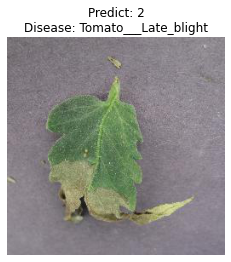

In [26]:
predict_img(model, '/content/drive/MyDrive/ปี 4 เทอม 2/ML/tomato/test/Tomato___Late_blight/01425d17-4c97-46e3-b395-c1453b78ab78___GHLB2 Leaf 9100.JPG')

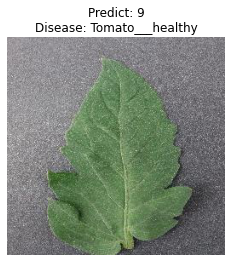

In [28]:
predict_img(model, '/content/drive/MyDrive/ปี 4 เทอม 2/ML/tomato/test/Tomato___healthy/223cb57a-b9b7-4c9a-b03e-701a8548ff4d___GH_HL Leaf 248.JPG')

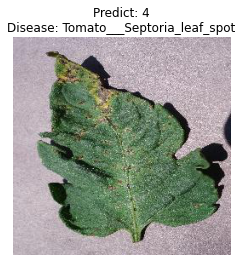

In [29]:
predict_img(model, '/content/drive/MyDrive/ปี 4 เทอม 2/ML/tomato/test/Tomato___Septoria_leaf_spot/939b8ab2-3d4d-4ee3-8677-18e29f2f8bc3___Matt.S_CG 1651.JPG')

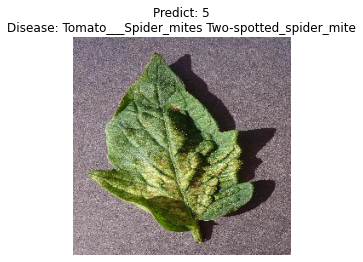

In [30]:
predict_img(model, '/content/drive/MyDrive/ปี 4 เทอม 2/ML/tomato/test/Tomato___Spider_mites Two-spotted_spider_mite/487fcd80-d74a-4e29-8959-7c02de6c5846___Com.G_SpM_FL 1240.JPG')

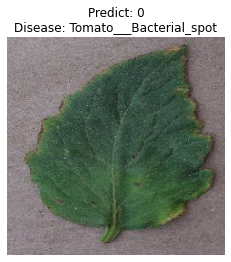

In [31]:
predict_img(model, '/content/drive/MyDrive/ปี 4 เทอม 2/ML/tomato/test/Tomato___Bacterial_spot/086880d1-73c4-40d3-99ea-d446c2299692___GCREC_Bact.Sp 3333.JPG')